# MIE 1613 A3 
- Due Date: 2023-03-22
- Name: William Hazen
- Student ID: 1009231225
- Department: MIE
- Program: M.Eng.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from scipy.stats import probplot, kstest
from scipy.stats.distributions import norm, expon, erlang, lognorm, triang
warnings.filterwarnings("ignore")
# fix random number seed
np.random.seed(1)

In [2]:
import statsmodels.api as sm

In [3]:
import SimRNG
import SimClasses
import SimFunctions

In [22]:
# %%shell
# jupyter nbconvert --to html /content/Hazen_MIE1613_A3.ipynb

# **1.**

## **1a)**

### **Q1a Logic**:

- After correctly loading the 'SemicondictorData.xls' I plotted to histograms to see what distributed may be appropiate for either dataset. After I plotted QQ plots with the respective choosen distributions and computed the KS test to see which distributed had the best fit.

In [4]:
temp_semiconductordata_df = pd.read_excel("SemiconductorData.xls", header=None)
temp_semiconductordata_df.head()

,0,1,2,3
0,LOAD/UNLOAD,0.443649,CLEAN,2.268070
1,NaN,0.078882,NaN,1.809860
2,NaN,0.055116,NaN,2.658220
3,NaN,0.152443,NaN,0.104393
4,NaN,0.125180,NaN,5.521070


In [5]:
semi_conductor_df = pd.DataFrame()
semi_conductor_df["CLEAN"] = temp_semiconductordata_df.iloc[:,1].values
semi_conductor_df["LOAD/UNLOAD"] =temp_semiconductordata_df.iloc[:,3].values
semi_conductor_df


,CLEAN,LOAD/UNLOAD
0,0.443649,2.268070
1,0.078882,1.809860
2,0.055116,2.658220
3,0.152443,0.104393
4,0.125180,5.521070
...,...,...
395,0.561125,NaN
396,0.040254,NaN
397,0.159128,NaN
398,0.033432,NaN


In [6]:
semi_clean = semi_conductor_df["CLEAN"]
semi_load_unload = semi_conductor_df["LOAD/UNLOAD"].dropna()


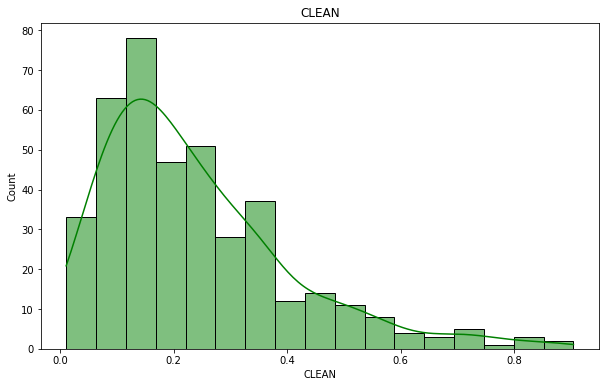

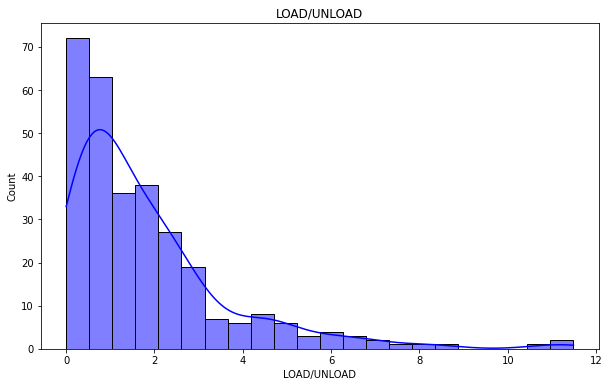

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(semi_clean, kde=True, color='g')
plt.title("CLEAN")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(semi_load_unload, kde=True, color='b')
plt.title("LOAD/UNLOAD")
plt.show()

- From the histograms both appear to be positively skewed. As such we can pick,
    - CLEAN: Gamma, Weibull, Lognormal, Expoential
    - LOAD/UNLOAD: Gamma, Weibull, Lognormal, Expoential

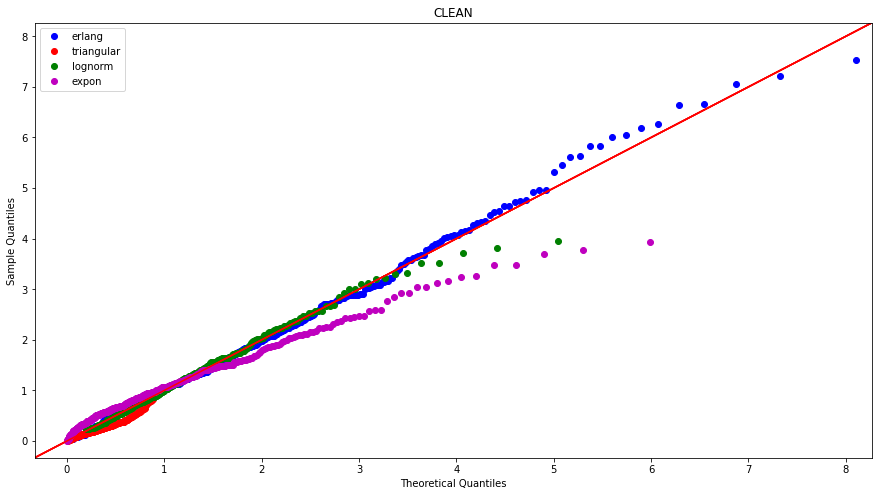

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sm.qqplot(semi_clean, dist=erlang, fit=True, line='45', ax=ax, label='erlang', markeredgecolor='b', markerfacecolor='b')
sm.qqplot(semi_clean, dist=triang, fit=True, line='45', ax=ax, label='triangular',  markeredgecolor='r', markerfacecolor='r')
sm.qqplot(semi_clean, dist=lognorm, fit=True, line='45', ax=ax, label='lognorm',  markeredgecolor='g', markerfacecolor='g')
sm.qqplot(semi_clean, dist=expon, fit=True, line='45', ax=ax, label='expon', markeredgecolor='m', markerfacecolor='m')
ax.legend()
plt.title("CLEAN")
plt.show()


In [9]:
erlang_params = erlang.fit(semi_clean)
triang_params = triang.fit(semi_clean)
lognorm_params = lognorm.fit(semi_clean)
expon_params = expon.fit(semi_clean)

erlang_ks = kstest(semi_clean, erlang.cdf, erlang_params)
triang_ks = kstest(semi_clean, triang.cdf, triang_params)
lognorm_ks = kstest(semi_clean, lognorm.cdf, lognorm_params)
expon_ks = kstest(semi_clean, expon.cdf, expon_params)

print("erlang distribution: ", erlang_ks)
print("triang distribution: ", triang_ks)
print("Log-normal distribution: ", lognorm_ks)
print("Exponential distribution: ", expon_ks)


erlang distribution:  KstestResult(statistic=0.023821568757411316, pvalue=0.973041872638831, statistic_location=0.169441, statistic_sign=1)
triang distribution:  KstestResult(statistic=0.2138268359822788, pvalue=1.5718803991948728e-16, statistic_location=0.352333, statistic_sign=1)
Log-normal distribution:  KstestResult(statistic=0.025048789678982608, pvalue=0.9579027921912369, statistic_location=0.32633, statistic_sign=-1)
Exponential distribution:  KstestResult(statistic=0.13823008686106902, pvalue=3.9571424774499914e-07, statistic_location=0.0813667, statistic_sign=-1)


- Best fit Erlang
- Worst fit Triangular

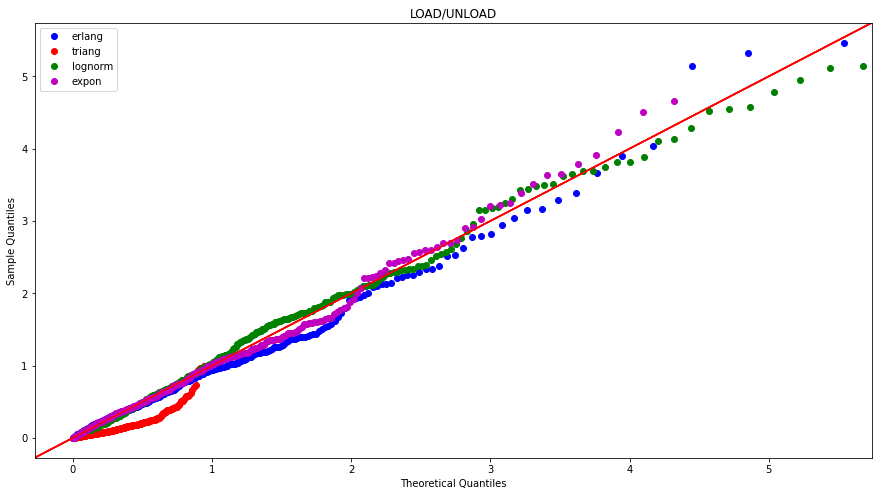

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sm.qqplot(semi_load_unload, dist=erlang, fit=True, line='45', ax=ax, label='erlang', markeredgecolor='b', markerfacecolor='b')
sm.qqplot(semi_load_unload, dist=triang, fit=True, line='45', ax=ax, label='triang',  markeredgecolor='r', markerfacecolor='r')
sm.qqplot(semi_load_unload, dist=lognorm, fit=True, line='45', ax=ax, label='lognorm',  markeredgecolor='g', markerfacecolor='g')
sm.qqplot(semi_load_unload, dist=expon, fit=True, line='45', ax=ax, label='expon', markeredgecolor='m', markerfacecolor='m')
ax.legend()
plt.title("LOAD/UNLOAD")
plt.show()


In [11]:
erlang_params = erlang.fit(semi_load_unload)
traing_params = triang.fit(semi_load_unload)
lognorm_params = lognorm.fit(semi_load_unload)
expon_params = expon.fit(semi_load_unload)

erlang_ks = kstest(semi_load_unload, erlang.cdf, erlang_params)
triang_ks = kstest(semi_load_unload, triang.cdf, traing_params)
lognorm_ks = kstest(semi_load_unload, lognorm.cdf, lognorm_params)
expon_ks = kstest(semi_load_unload, expon.cdf, expon_params)

print("erlang distribution: ", erlang_ks)
print("triang distribution: ", triang_ks)
print("Log-normal distribution: ", lognorm_ks)
print("Exponential distribution: ", expon_ks)


erlang distribution:  KstestResult(statistic=0.06173494407250746, pvalue=0.1947739637513931, statistic_location=3.02372, statistic_sign=1)
triang distribution:  KstestResult(statistic=0.3912260681130354, pvalue=7.088697284780142e-42, statistic_location=2.6643, statistic_sign=1)
Log-normal distribution:  KstestResult(statistic=0.04499724551051243, pvalue=0.5624971701774959, statistic_location=1.8014, statistic_sign=-1)
Exponential distribution:  KstestResult(statistic=0.036941322364339446, pvalue=0.79332343249565, statistic_location=3.02372, statistic_sign=1)


- Best fit log-normal
- Worst fit triang

- For the CLEAN data, the only distribution that was rejected was exponential (as the alpha > 0.05) but the others were acceptable. However, I choose the erlang distribution as it provided a better overall fit (specifically in the tail) and it had the highest p-value and one of the lowest KS scores.
- For the LOAD/UNLOAD data, most of the distributions were accepted and overall in the QQ plot it was somewhat difficult to choose which was better apart from triang. Though the erlang did have a poorer tail towards the end log-normal and exponential were fairly close. After examining the alphas and p-values, the Exponential had the highest p-value, lowest alpha and the shape of the QQ plot, I choose to use the Exponential distribution.

## **1b)**

### **Q1b Logic**:

- .

In [12]:
erlang.fit(semi_clean)


(1.9454725151214154, 0.005333559292158887, 0.1194672425749575)

In [13]:
np.mean(semi_clean)

0.23775335925

In [14]:
k, loc, scale = erlang.fit(semi_clean)

phase = round(k)
erlang_mean = phase * scale

print("Phase: ", phase)
print("Mean: ", erlang_mean)


Phase:  2
Mean:  0.238934485149915


In [15]:
expon.fit(semi_load_unload)


(0.00157231, 1.8213535372333334)

In [16]:
loc, scale = expon.fit(semi_load_unload)
mean = scale

print("Mean prime: ", mean)


Mean prime:  1.8213535372333334


In [17]:
semi_clean_mean = np.mean(semi_clean)
semi_load_unload_mean = np.mean(semi_load_unload)
semi_load_unload_var = np.var(semi_load_unload)


In [18]:
erlang_samples_pysim = [SimRNG.Erlang(2, erlang_mean, 1) for x in range(0,100000)]
np.mean(erlang_samples_pysim)

0.2382088746037045

In [19]:
erlang_samples_pysim = [SimRNG.Erlang(2, erlang_mean, 1) for x in range(0,100000)]
np.mean(erlang_samples_pysim)

0.23926927428677663

In [20]:
expo_samples_pysim = [SimRNG.Expon(semi_load_unload_mean, 1) for x in range(0,100000)]
np.mean(expo_samples_pysim)


1.826535445383794

In [48]:
class P_Entity():  # From SimRNG
    # This is the generic Entity that has a single attribute CreateTime
    def __init__(self, Product):
        # Executes with the Entity object is created to initialize variables
        # Add additional problem-specific attributes here
        self.Product = Product
        self.numPass = 0

        if self.Product == 'C':
            self.passes = 5
        else:
            self.passes = 3


In [47]:
ZSimRNG = SimRNG.InitializeRNSeed()

Queue = SimClasses.FIFOQueue()
Wait = SimClasses.DTStat()
Server = SimClasses.Resource()
Calendar = SimClasses.EventCalendar()

Clean_Queue = SimClasses.FIFOQueue()
LoadQTZ_Queue = SimClasses.FIFOQueue()
UnloadQTZ_Queue = SimClasses.FIFOQueue()
OXD_Queue = SimClasses.FIFOQueue()
FIN_Product = SimClasses.FIFOQueue()

Clean_Machine = SimClasses.Resource()
LoadQTZ_Machine = SimClasses.Resource()
UnloadQTZ_Machine = SimClasses.Resource()
OXD_Machine = SimClasses.Resource()

TheCTStats = []
TheDTStats = []
TheQueues = []
TheResources = []

TheDTStats.append(Wait)
TheQueues.append(Clean_Queue)
TheQueues.append(LoadQTZ_Queue)
TheQueues.append(UnloadQTZ_Queue)
TheQueues.append(OXD_Queue)
TheQueues.append(FIN_Product)
TheResources.append(Clean_Machine)
TheResources.append(LoadQTZ_Machine)
TheResources.append(UnloadQTZ_Machine)
TheResources.append(OXD_Machine)

Clean_Machine.SetUnits(9)
LoadQTZ_Machine.SetUnits(2)
UnloadQTZ_Machine.SetUnits(2)
OXD_Machine.SetUnits(11)

QueLength_C = SimClasses.DTStat()
QueLength_D = SimClasses.DTStat()
            
# 60% of products to be of type (C) and product(C) requires 5 passes
# 40% of type (D). product D requires 3 passes.

release_time = 1/4  # 1/4 hours = 15min
OXD_time_C = 2.7  # hours
OXD_time_D = 2.0  # hours
prob_C = 0.6
prob_D = 0.4

# from part A
k_phase = 2
erlang_mean = 0.23242023688692282

loc, expo_scale = expon.fit(semi_load_unload)
expo_mean = expo_scale

RunLength = 1000
WarmUp = 1000

MeanProductC = []
MeanProductD = []


def Release():
    SimFunctions.Schedule(Calendar, "Release", release_time)
    U = SimRNG.Uniform(0, 1, 1)
    if U < prob_C:
        pt = 'C'
    else:
        pt = 'D'

    product = P_Entity(Product=pt)
    Clean_Queue.Add(product)

    if (Clean_Machine.Busy > 0) and (Clean_Machine.Busy < Clean_Machine.NumberOfUnits):
        SimFunctions.Schedule(Calendar, "Clean", release_time)

def Clean():
    if (LoadQTZ_Machine.Busy > 0) and (LoadQTZ_Machine.Busy < LoadQTZ_Machine.NumberOfUnits):
        SimFunctions.Schedule(Calendar, "End_Clean",
                                SimRNG.Erlang(k_phase, erlang_mean, 1))
    Clean_Machine.Seize(1)

def Load():
    if (UnloadQTZ_Machine.Busy > 0) and (UnloadQTZ_Machine.Busy < UnloadQTZ_Machine.NumberOfUnits):
        SimFunctions.Schedule(Calendar, "End_Load",
                                SimRNG.Expon(expo_mean, 2))
    LoadQTZ_Machine.Seize(1)

def Unload():
    if (OXD_Machine.Busy > 0) and (OXD_Machine.Busy < OXD_Machine.NumberOfUnits):
        SimFunctions.Schedule(Calendar, "End_Unload",
                                SimRNG.Expon(expo_mean, 3))
    UnloadQTZ_Machine.Seize(1)

def Oxidize():
    OXD_Machine.Seize(1)
    pt = OXD_Queue.pt
    if pt == 'C':
        SimFunctions.Schedule(Calendar, "EndOfOxidize", OXD_time_C)
    else:
        SimFunctions.Schedule(Calendar, "EndOfOxidize", OXD_time_D)

def End_Clean():
    DONE = Clean_Queue.Remove()

    LoadQTZ_Queue.Add(DONE)
    if LoadQTZ_Machine.Busy < LoadQTZ_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Load", 0)
    if Clean_Queue.NumQueue() > Clean_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Clean", 0)
        Clean_Machine.Free(1)

def End_Load():
    DONE = LoadQTZ_Queue.Remove()

    OXD_Queue.Add(DONE)
    if OXD_Machine.Busy < OXD_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Oxidize", 0)

    if LoadQTZ_Queue.NumQueue() > LoadQTZ_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Load", 0)
        LoadQTZ_Machine.Free(1)


def End_Unload():
    DONE = UnloadQTZ_Queue.Remove()

    DONE.numPass =  DONE.numPass + 1
    if DONE.numPass > DONE.passes:
        Clean_Queue.Add(DONE)
    """
    ... Continue
    """


def EndOfOxidize():
    DONE = OXD_Queue.Remove()
    UnloadQTZ_Queue.Add(DONE)

    if OXD_Queue.NumQueue() > OXD_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Oxidize", 0)
        OXD_Machine.Free(1)
    if UnloadQTZ_Machine.Busy < UnloadQTZ_Machine.NumberOfUnits:
        SimFunctions.Schedule(Calendar, "Unload", 0)

for reps in range(0, 10, 1):
    MeanProductC = []
    MeanProductD = []
    SimFunctions.SimFunctionsInit(
        Calendar, TheQueues, TheCTStats, TheDTStats, TheResources)
    SimFunctions.Schedule(Calendar, "Release", release_time)
    SimFunctions.Schedule(Calendar, "EndSimulation", RunLength)
    SimFunctions.Schedule(Calendar, "ClearIt", WarmUp)

    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime

    if NextEvent.EventType == "Release":
        Release()

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime

        if NextEvent.EventType == "Release":
            Release()
        elif NextEvent.EventType == "Clean":
            Clean()
        elif NextEvent.EventType == "Load":
            Load()
        elif NextEvent.EventType == "Unload":
            Unload()
        elif NextEvent.EventType == "Oxidize":
            Oxidize()
        elif NextEvent.EventType == "End_Clean":
            End_Clean()
        elif NextEvent.EventType == "End_Load":
            End_Load()
        elif NextEvent.EventType == "End_Unload":
            End_Unload()
        elif NextEvent.EventType == "EndOfOxidize":
            EndOfOxidize()
        elif NextEvent.EventType == "ClearIt":
            SimFunctions.ClearStats(TheCTStats, TheDTStats)

        MeanProductC.append(QueLength_C.Mean())
        MeanProductD.append(QueLength_D.Mean())
        
print("Average wait for Product C:", np.mean(MeanProductC))
print("Average wait for Product D:", np.mean(MeanProductD))


Average wait for Product C: 0.0
Average wait for Product D: 0.0


### **Q3 Results**:

- Although it the code is unfinished, to make sure that the simulation can produce accuracte wait times for product C and D. The warm-up period should be more than a 1000hrs as machinery in motion may be slow during the beginning until all parts are aligned and calibrated.

# **2.**

### **Q2 Logic**:

- The code is extracted from the M(t)/M/inf example in the PySim folder, where it was modified to fit this problem. In the problem it is stated that the incoming calls (arrivals) follow a non-homogeneous Poisson process a lamda rate function. This process follows a M(t)/M/inf simulation thus I used the following code.

In [23]:
#M(t)/M/inf
ZSimRNG = SimRNG.InitializeRNSeed()

Queue = SimClasses.FIFOQueue()
Wait = SimClasses.DTStat()
Server = SimClasses.Resource()
Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
TheResources = []

TheDTStats.append(Wait)
TheQueues.append(Queue)

Max_CallRate = 1/4  # max 4 per min
MeanDroneRate = 45  # 45min
RunLength = 24*60  # 24 hours in mins

N = 0
MaxQueue = 0
Drone = SimClasses.CTStat()
TheCTStats.append(Drone)

RepNum = 1000
AllWaitMean = []
AllQueueMean = []
AllQueueNum = []
AllQueMax = []


AllDrone_QueLength = []
AllMaxQueue = []
AllN = []

def Call_Rate():
    if SimClasses.Clock <= 5 * 60:      # 7am-12pm
        call_rate = 1/4   # 4 per min
    elif SimClasses.Clock <= 17 * 60:   # 12pm-12am
        call_rate = 1/2  # 2 per min
    else:                              # 12am-7am       #Assume no calls at 12am
        call_rate = 1/1  # 1 per min
    return call_rate

def NSPP(Stream):
    PossibleArrivalTime = SimClasses.Clock + SimRNG.Expon(1/Max_CallRate, Stream)
    while SimRNG.Uniform(0, 1, Stream) >= Call_Rate()/Max_CallRate:
        PossibleArrivalTime = PossibleArrivalTime + SimRNG.Expon(1/Max_CallRate, Stream)
    nspp = PossibleArrivalTime - SimClasses.Clock
    return nspp

def Call():
    global MaxQueue
    global N
    InterarrivalTime = NSPP(1)
    SimFunctions.Schedule(Calendar, "Call", InterarrivalTime)
    N = N + 1
    Drone.Record(N)
    if N > MaxQueue:
        MaxQueue = N
    SimFunctions.Schedule(Calendar, "Departure",SimRNG.Expon(MeanDroneRate, 2))

def EndOfService():
    global N
    N = N - 1
    Drone.Record(N)


for Reps in range(0, RepNum, 1):
    N = 0
    MaxQueue = 0

    SimFunctions.SimFunctionsInit(
        Calendar, TheQueues, TheCTStats, TheDTStats, TheResources)
    SimFunctions.Schedule(Calendar, "Call", SimRNG.Expon(Max_CallRate, 1))
    SimFunctions.Schedule(Calendar, "EndSimulation", RunLength)

    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime
    if NextEvent.EventType == "Call":
        Call()
    elif NextEvent.EventType == "EndOfService":
        EndOfService()

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "Call":
            Call()
        elif NextEvent.EventType == "EndOfService":
            EndOfService()

    AllDrone_QueLength.append(Drone.Mean())
    AllMaxQueue.append(MaxQueue)
    AllN.append(N)

# estimating the 0.99th quantile
quantile_index = int(np.ceil(RepNum*0.95)-1)
sorted_que = np.sort(AllDrone_QueLength)
lower_CI_95 = sorted_que[936]
upper_CI_95 = sorted_que[964]

output = {
    "Average number of drones": np.mean(AllDrone_QueLength),
    "95% Probability":  np.sort(AllDrone_QueLength)[quantile_index],
    "lower_CI_95": lower_CI_95,
    "upper_CI_95": upper_CI_95,
}

## **2a)**

- The model I choose to estimate the minimum number of drones that will be readliy available at the event of a cardiac arrest is a M(t)/M/inf queue. This decision was choosen based on the model following a queuing system with an arrival rate that is assumed to be non-homogeneous Possion process. To determin the minimum number of drones at the base, I first initalized the arrival rate being the Call_Rate() function where it Sim.Clock will determine the expected call frequency at that time. The max renewal arrival will be the max call rate in the given day which is 4 per minute at 7am-12pm and since the simulation is based in minutes the value is 1/4. Furthermore, the MeanDroneRate = 45min which this is plugged into exponential distribution to give us the total time a drone was in service.
- When a call is received the process to send out a drone goes through thinning process in order to satisfy the non-homogeneous Poisson process - if not the simulation Poisson process would be homogenous. This is done by generating a value from a uniformed disitrbution (*U*) from 0 to 1 where if *U* is less than a exponential distribution of the current call rate divided by the max renewal arrival rate then a drone is intiallized and its duration is queued. 
- Metrics: I first find the max queue where we can see how long the que can get which will tell us the minimum number of drones needed at the base. Additionally, we can calculate the mean of the ques such that it will provide the average number of drones in que.  

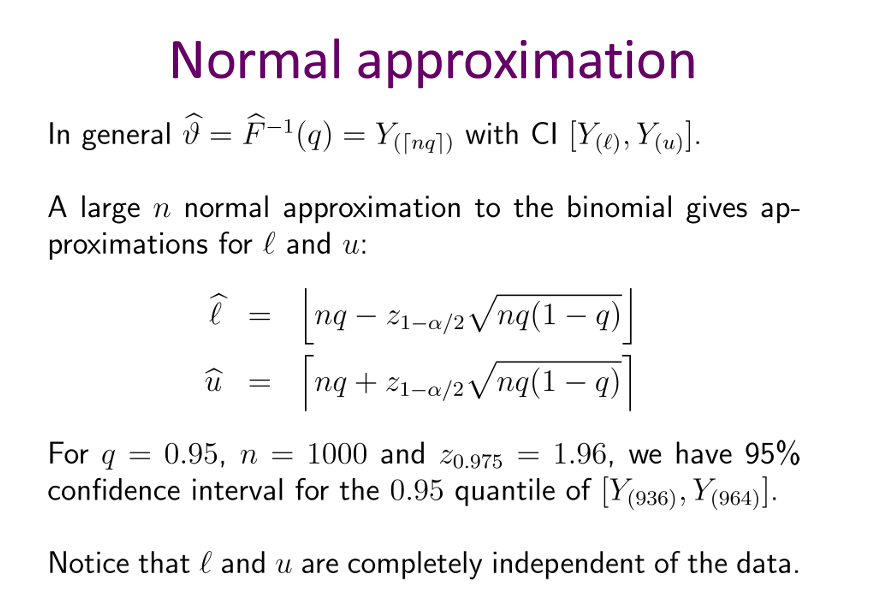

## **2b)**

In [24]:
output


{'Average number of drones': 180.99568526211416,
 '95% Probability': 198.15436715153103,
 'lower_CI_95': 196.81817917062952,
 'upper_CI_95': 200.04086627295578}

### **Q2 Results**:

- Minimum number of drones needed to ensure that 95% probability there will be a drone available at the event of a cardiac arrest the area approx 199-200 drones. The average number of drones in the Queue is around 181. The lower and and upper CI were calculated by using the slide shown above where our q and n matched the values. This by simply plugging the 936 and 964 index in the drone que length list we can find the CI's being around 197 and 200.

# **3.**

### **Q3 Logic**:

- After loading the TSLA.csv into a panda dataframe, I created a new column "log_returns" was consists of the of the current close values divided previous close value. From here I can take the mean and std from the "log_return" column and extracted normally distributed values from them to which I rearrange the equation given [log(s(ti)/s(ti-1)) ~ N(mu, sigma)] for S(ti) and I plotted the histograms for "Close" and "returns" where I was able to see that returns do indeed follow a normal bell curve. I then created a monte carlo simulation of the simulated GBM by taking the previous closing value and adding randomly normal distibuted noise from the mean and std of the "log_returns".

- Lastly I then used probplot to see the QQ plots for the Close, Return and Monte Carlo Return.

## **3a)**

In [25]:
TSLA_df = pd.read_csv("TSLA.csv")
TSLA_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100
1,2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000
2,2022-03-10,283.816681,284.816681,270.119995,279.433319,279.433319,58648500
3,2022-03-11,280.066681,281.266663,264.589996,265.116669,265.116669,67037100
4,2022-03-14,260.203339,266.899994,252.013336,255.456665,255.456665,71152200


In [26]:
TSLA_df["log_returns"] = np.log(TSLA_df['Close'] / TSLA_df['Close'].shift(1))
#TSLA_df["returns"] = (TSLA_df['Close'] - TSLA_df['Close'].shift(1))


In [27]:
tesla_mu = TSLA_df["log_returns"].mean()
tesla_sigma = TSLA_df["log_returns"].std()
print("Log: mu = {}, Sigma = {}".format(tesla_mu, tesla_sigma))

Log: mu = -0.0015245810428404923, Sigma = 0.04278823823521892


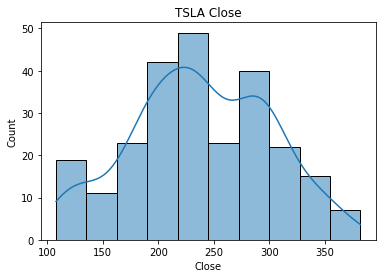

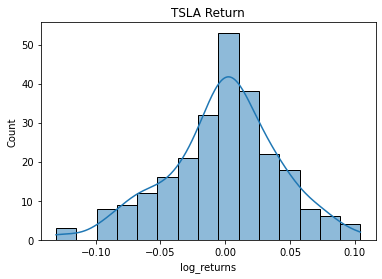

In [28]:
sns.histplot(TSLA_df["Close"], kde=True)
plt.title("TSLA Close")
plt.show()

sns.histplot(TSLA_df["log_returns"], kde=True)
plt.title("TSLA Return")
plt.show()


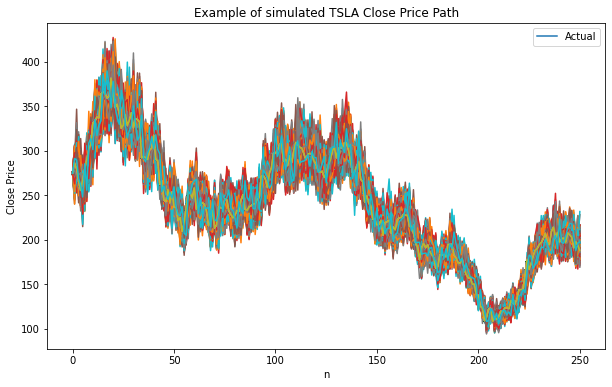

In [29]:
def f(x_list):
    return np.mean(x_list)

n_samples = 1000

Monte_Sim_TSLA = []

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(n_samples):
    np.random.seed(i)
    n = len(TSLA_df)
    returns_sim = np.random.normal(tesla_mu, tesla_sigma, n)
    S1 = TSLA_df['Close'].iloc[0]
    Sim_TSLA = [S1]

    for i in range(1, n):
        Sim_TSLA.append(TSLA_df["Close"].shift(1)[i] * np.exp(returns_sim[i])) # rearranged 
        
    ax.plot(TSLA_df['Close'])
    ax.plot(Sim_TSLA)

    Monte_Sim_TSLA.append(f(Sim_TSLA))

ax.legend(['Actual'])
ax.set_title("Example of simulated TSLA Close Price Path")
ax.set_xlabel("n")
ax.set_ylabel("Close Price")
plt.show()


## **3b)**

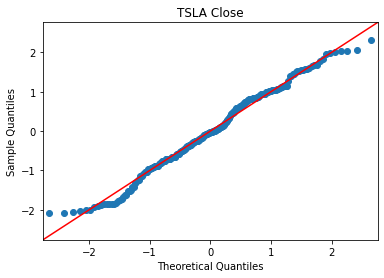

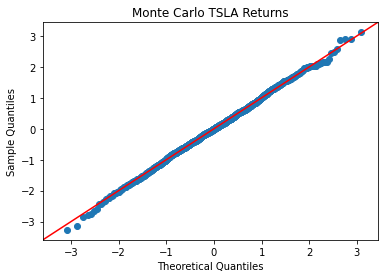

In [30]:
sm.qqplot(TSLA_df['Close'], fit=True, line='45')
plt.title("TSLA Close")

sm.qqplot(np.array(Monte_Sim_TSLA), fit=True, line='45')
plt.title("Monte Carlo TSLA Returns")
plt.show()


In [31]:
import pingouin as pg
print(pg.normality(TSLA_df["Close"]))
print()
print("monte carlo TSLA")
print(pg.normality(Monte_Sim_TSLA))


              W      pval  normal
Close  0.985166  0.010409   False

monte carlo TSLA
          W      pval  normal
0  0.998951  0.846633    True


In [32]:
norm_params = norm.fit(np.array(Monte_Sim_TSLA))

GBM_fit_ks = kstest(np.array(Monte_Sim_TSLA), norm.cdf, norm_params)

print("KS test for Monte Carlo GBM Sim: ", GBM_fit_ks)

KS test for Monte Carlo GBM Sim:  KstestResult(statistic=0.013862126212812687, pvalue=0.9893348240484904, statistic_location=238.8133018075921, statistic_sign=1)


### **Q3 Results**:
- From the simulation plot we can see that the overall fit of our model is good. This is also confirmed by the QQ plot of the Monte Carlo sim data, where the normal distribution line does appear to be true. I also verified this with the pingouin lib package it indicated that the monte carlo sim is indeed normal based on its metric.
- As for the KS test, the KS statistic is 0.01386 and the p-value is 0.0.989. The test statistic is small, indicating a good fit between the sample data and the theoretical normal distribution. The p-value is greater than 0.05, indicating that we cannot reject the null hypothesis and accept that the sample data is consistent with the theoretical distribution. Therefore, we can conclude that the Monte Carlo GBM simulation fits the theoretical distribution being tested. 

# **4.**

### **Q4 Logic**:

- I first algebraically inversed F(x) and solved for F^-1(x) where I produced **x = gamma * tan(F(x) - 1/2 * pi) + x_0**. I set x to be random uniformed value between 0 and 1 to I then store a list of F^-1(x) values over 5 interations and 1000 samples for the Monte Carlo. I then ploted a histogram to see the distribution and it does appear to be Cauchy as the mena an variance seems to be unstable but overall shape is a bell curve. I then took the 1/2 qunatile and interquantile being the 3/4-1/4 qunatiles by sorting the f_n1 list and taking the 0.25, 0.5, and 0.75 values.

## **4a)**

In [33]:
gamma = 2
x_0 = 0

n_samples = 1000
np.random.seed(716)  # re-seed the random number generator

f_n1 = []
for i in range(n_samples):
    x = gamma * np.tan(((np.random.uniform(0, 1)) - 1/2) * np.pi) + x_0
    f_n1.append(x)


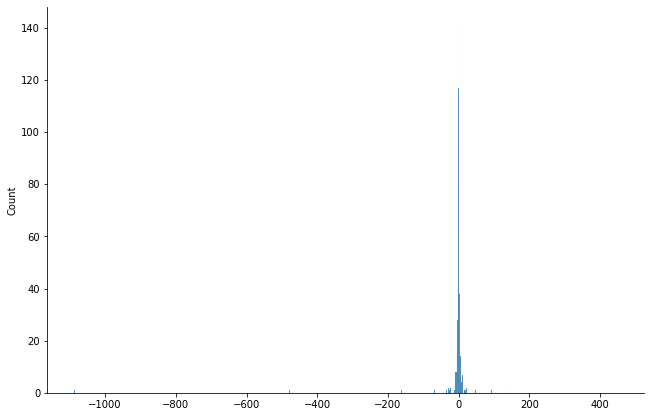

In [34]:
x_list_plot = sns.displot(f_n1)
x_list_plot.fig.set_figwidth(10)
x_list_plot.fig.set_figheight(6)
plt.show()

## **4b)**

In [35]:
sorted_x_list = np.sort(f_n1)

half_quantile = sorted_x_list[int(1/2 * len(sorted_x_list))]
three_quarter_quantile = sorted_x_list[int(3/4 * len(sorted_x_list))] 
one_quarter_quantile = sorted_x_list[int(1/4 * len(sorted_x_list))]
inter_quantile = three_quarter_quantile - one_quarter_quantile

print("1/2 Quantile = {} | half of the inter-quartile = {}".format(half_quantile, inter_quantile/2))


1/2 Quantile = 0.014467969316487193 | half of the inter-quartile = 1.915957138227425


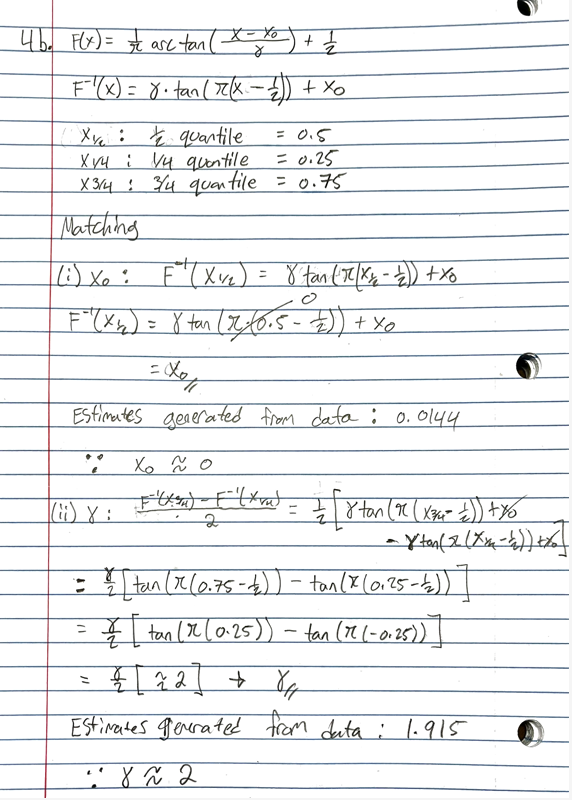

### **Q4 Results**:
- This process of matching was does using estimates and algebraic formulations for the parameters. X_0 and gamma are the only parameters left after deriving the inversion algorithm and plugging the quantiles.
- The cauchy distribustion median and mode is defined by x_0 thus by taking the 1/2 qunatile of the inversion algorithm the values is approx 0, by matching x_0 to the estimated parameter we can see the property stays true. Moreover for gamma, taking half of the interqunatile does ineed produce a values approx 2. Additionally I test these results with a larger Monte Carlo sim and the value start approach the exact theorical values being 0 and 2.

# **5.**

### **Q5 Logic**:

- After uploading the CallCounts.xls to a panda dataframe, I used the describe function to produce the unbiased estimates for the mean and variance for the number of call for each hour. I then cumatively summed these values to produce *X* and *y* for our logistic regression model from sklearn. X is the cummulative sum of the mean number of calls for each hour and y is the cummulative sum of the variance. I first fit the model and then use **model.predict(X)** and **model.score(X,y)** to regression predictions where the line is the minimized sum of squared distances from the predictions data points and the *y* data points. I was also able to get the *R^2* and *Beta* from the **model.coef_[0]**.

In [36]:
CallCounts_df = pd.read_excel("CallCounts.xls")
CallCounts_df.head()

,8AM-9AM,9AM-10AM,10AM-11AM,11AM-12PM,12PM-1PM,1PM-2PM,2PM-3PM,3PM-4PM
0,27,37,58,68,65,33,37,21
1,27,35,67,93,74,42,39,21
2,25,39,58,75,82,34,46,19
3,18,42,48,75,62,51,49,14
4,29,42,65,88,70,43,45,22


In [37]:
N_t = CallCounts_df.cumsum(axis=1)
N_t.head()

,8AM-9AM,9AM-10AM,10AM-11AM,11AM-12PM,12PM-1PM,1PM-2PM,2PM-3PM,3PM-4PM
0,27,64,122,190,255,288,325,346
1,27,62,129,222,296,338,377,398
2,25,64,122,197,279,313,359,378
3,18,60,108,183,245,296,345,359
4,29,71,136,224,294,337,382,404


In [38]:
mean_call_list = (N_t.describe()[1:2].values)[0]
var_call_list = ((N_t.describe()[2:3].values)**2)[0]

In [39]:
from sklearn.linear_model import LinearRegression

X = np.array(mean_call_list).reshape(-1,1)
y = var_call_list

model = LinearRegression(fit_intercept=False) #set regression through the origin
model.fit(X,y)
predictions = model.predict(X)
score = model.score(X,y)

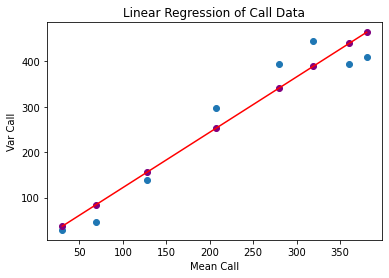

In [40]:
plt.scatter(X, y)
plt.scatter(X, predictions, color='purple')
plt.plot(X, predictions, color='red')
plt.title("Linear Regression of Call Data")
plt.xlabel("Mean Call")
plt.ylabel("Var Call")
plt.show()


In [41]:
results = pd.DataFrame({"Cumlative Mean Sum": mean_call_list,"Cumlative Variance Sum": var_call_list, "Regression Results": predictions})
results

,Cumlative Mean Sum,Cumlative Variance Sum,Regression Results
0,30.193548,28.627957,36.805549
1,68.967742,46.365591,84.070795
2,127.741935,139.264516,155.715785
3,207.225806,297.513978,252.605606
4,279.935484,393.062366,341.237772
5,319.354839,445.703226,389.289461
6,360.580645,394.384946,439.543192
7,380.612903,409.845161,463.962258


In [42]:
print('Beta:', model.coef_[0])
print("R^2:", score)

Beta: 1.2189872025880588
R^2: 0.9294650569826916


### **Q5 Results**:

- *R^2* = 0.929
- *Beta* = 0.123
- The Beta value produced by the regression model supports the choice of a nonstationary Poisson arrival process as the values (shown above) is quite close to the theorical value of 1. Additionally, the R^2 values being almost 1 supports that the model fit is quite good.